In [1]:
#from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.random.randint(10,size=(10,10))
data

array([[2, 9, 7, 0, 3, 5, 2, 8, 1, 8],
       [9, 3, 3, 5, 2, 7, 5, 5, 5, 1],
       [6, 2, 0, 2, 9, 0, 3, 4, 1, 0],
       [0, 4, 0, 7, 8, 6, 8, 1, 6, 8],
       [7, 1, 4, 5, 3, 1, 5, 3, 5, 6],
       [3, 8, 7, 9, 9, 6, 0, 8, 1, 2],
       [4, 8, 0, 9, 0, 5, 8, 6, 6, 4],
       [3, 6, 5, 4, 6, 2, 1, 1, 4, 5],
       [2, 5, 2, 0, 4, 9, 5, 6, 1, 7],
       [3, 6, 5, 1, 3, 3, 1, 3, 3, 2]])

In [4]:
length = 100

In [5]:
# Create a distribution of points.  It will be centered around (0,0)
point_distribution_A = np.random.randint(low=-10, high=20,size=(length,2))
x_A,y_A = point_distribution_A.T

In [6]:
point_distribution_B = np.random.randint(low=-30, high=0, size=(length,2))
x_B,y_B = point_distribution_B.T

In [7]:
point_distribution_A[:10]

array([[ 12,  -6],
       [ 15,  17],
       [ 12,  12],
       [ 17,  16],
       [ 19,  10],
       [  1, -10],
       [ 16,  15],
       [  9,  12],
       [ 10,  -5],
       [  1,  16]])

In [8]:
point_distribution_B[:10]

array([[-18, -26],
       [-27, -26],
       [-17, -20],
       [ -3,  -1],
       [ -3, -10],
       [-16,  -1],
       [-28,  -5],
       [-26, -21],
       [-26,  -9],
       [-18,  -3]])

In [9]:
x_A[:10], y_A[:10], x_B[:10], y_B[:10]

(array([12, 15, 12, 17, 19,  1, 16,  9, 10,  1]),
 array([ -6,  17,  12,  16,  10, -10,  15,  12,  -5,  16]),
 array([-18, -27, -17,  -3,  -3, -16, -28, -26, -26, -18]),
 array([-26, -26, -20,  -1, -10,  -1,  -5, -21,  -9,  -3]))

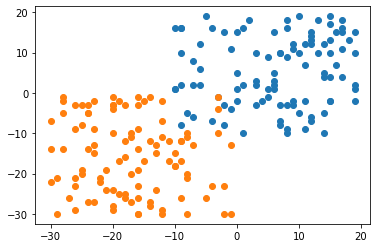

In [10]:
# Plot both distributions.  A distribution is blue, B distribution is orange.
plt.scatter(x_A,y_A)
plt.scatter(x_B,y_B)

In [11]:
# Join data.
all_x = np.concatenate((x_A,x_B), axis=0)
all_y = np.concatenate((y_A,y_B), axis=0)

In [12]:
all_x, all_y

(array([ 12,  15,  12,  17,  19,   1,  16,   9,  10,   1,   4,   6,  15,
         13,  19,  12,   9,  10,  -6,  -4,   3, -10,  19,  -2,  -7,  -4,
         -6,   5,  17,   9,   0,   2,  14,  19,  15,  17,  -1,   0,  -9,
         14,  -7,  -6,  11,  -9,  14, -10,  13,   0,  -2,  12,   0,  -8,
         18,  19,  16,  -7,  12,  15,   7,   6,   8,   8,   3,  15,   7,
         15,   7,   1,  11,  12,  -2,  14,   7,   5,   8,   6,  17,   7,
          8,   3,  -9,  17,  -5,  -3, -10,  14,  11,   9,   6,  -9,  10,
         -1,   6,  -9,   3,   5,   8,   8,  15,  11, -18, -27, -17,  -3,
         -3, -16, -28, -26, -26, -18, -20, -29, -15, -18, -11,  -4, -30,
        -12, -23, -20, -19, -20, -16, -19,  -1, -13,  -8, -13, -20, -30,
        -17, -16, -20, -22, -23, -14, -23, -16, -14, -24, -15,  -1, -28,
         -3,  -9, -16, -26, -12,  -2, -10, -10, -19, -14,  -8, -16,  -7,
        -20, -17, -25, -13, -30, -23, -24,  -2,  -8, -20, -16,  -8, -29,
         -9, -16,  -9, -12, -11, -18, -24, -28, -14

In [13]:
all_data = np.vstack((all_x, all_y)).T
all_data, all_data.shape

(array([[ 12,  -6],
        [ 15,  17],
        [ 12,  12],
        [ 17,  16],
        [ 19,  10],
        [  1, -10],
        [ 16,  15],
        [  9,  12],
        [ 10,  -5],
        [  1,  16],
        [  4,  -2],
        [  6,   1],
        [ 15,  -2],
        [ 13,  18],
        [ 19,   2],
        [ 12,  15],
        [  9,  -3],
        [ 10,  10],
        [ -6,   2],
        [ -4,  -7],
        [  3,  10],
        [-10,   1],
        [ 19,  15],
        [ -2,  -3],
        [ -7,   2],
        [ -4,  16],
        [ -6,   6],
        [  5,   9],
        [ 17,  15],
        [  9,  11],
        [  0,  15],
        [  2,  18],
        [ 14,   5],
        [ 19,   1],
        [ 15,   4],
        [ 17,  11],
        [ -1,  -4],
        [  0,  -2],
        [ -9,  16],
        [ 14,   4],
        [ -7,   8],
        [ -6,  12],
        [ 11,  -2],
        [ -9,   2],
        [ 14,  -5],
        [-10,   1],
        [ 13,  10],
        [  0,   1],
        [ -2,  15],
        [ 12,  -7],


In [14]:
# A distribution = 0 (blue), B distribution = 1 (orange)
labels = np.concatenate((np.zeros(length),np.ones(length)),axis=0)
labels, labels.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 (200,))

In [15]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=2)

In [16]:
fitted = clf.fit(all_data, labels)

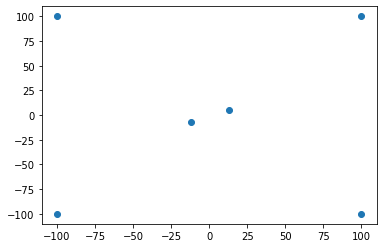

In [17]:
# Create and plot test data.  Results should be 0, 1, 0, ?, ?, 1
test_data = np.array([[13,5],[-12,-7],[100,100],[100,-100],[-100,100],[-100,-100]])
x_test,y_test = test_data.T
x_test,y_test
plt.scatter(x_test,y_test)

In [18]:
fitted.predict(test_data)

array([0., 1., 0., 1., 0., 1.])

In [24]:
fitted.predict_proba(test_data)

array([[0.96808511, 0.03191489],
       [0.02173913, 0.97826087],
       [0.96808511, 0.03191489],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.02173913, 0.97826087]])

[Text(167.4, 181.2, 'X[0] <= -7.5\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(83.7, 108.72, 'X[1] <= 0.0\ngini = 0.165\nsamples = 99\nvalue = [9, 90]'),
 Text(41.85, 36.23999999999998, 'gini = 0.043\nsamples = 92\nvalue = [2, 90]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -11.5\ngini = 0.178\nsamples = 101\nvalue = [91, 10]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(292.95, 36.23999999999998, 'gini = 0.062\nsamples = 94\nvalue = [91, 3]')]

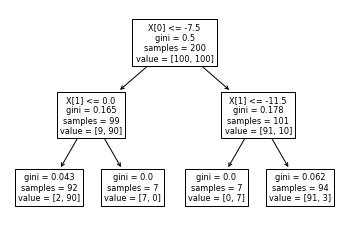

In [19]:
tree.plot_tree(clf)

In [20]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score?

In [22]:
cross_val_score(clf, all_data, labels)

array([0.95 , 0.95 , 0.9  , 0.975, 0.975])